<a href="https://colab.research.google.com/github/mvdheram/Social-bias-Detection/blob/main/DistlBERT_Anti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ktrain

     |████████████████████████████████| 25.3MB 135kB/s 
     |████████████████████████████████| 983kB 51.7MB/s 
     |████████████████████████████████| 266kB 52.0MB/s 
     |████████████████████████████████| 1.3MB 52.3MB/s 
     |████████████████████████████████| 1.1MB 43.7MB/s 
     |████████████████████████████████| 471kB 49.0MB/s 
     |████████████████████████████████| 2.9MB 48.3MB/s 
     |████████████████████████████████| 890kB 45.6MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.2-cp36-none-any.whl size=25276306 sha256=591357abc2d3f2fe7646f985c200399f25fb3eb90eea4cb84dbb71d0be700f32
  Stored in directory: /root/.cache/pip/wheels/fe/56/00/25444c352cc843e5c5daea0e9517a192878ae22c2c6b5f4573
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=1186489626e826de5d8c6d0ee73e6c7355aadd0bea62d0141e9133006f6fe157
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
  Created wheel for syn

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

#### Importing data 

In [26]:
import ktrain
from ktrain import text
import pandas as pd

In [27]:
dataset = pd.read_csv('/content/sample1.csv',usecols=['sentences','bias_type'])

In [28]:
len(dataset)

8406

In [29]:
dataset.head()

,sentences,bias_type
0,Women don't know how to drive.,gender
1,My mom spent all day cooking for Thanksgiving,gender
2,Melissa spent her days watching Lifetime and i...,gender
3,Cheryl was bad at saving money and thus had a ...,gender
4,Jenny watched in astonishment as the world cla...,gender


In [30]:
X = dataset.iloc[:,0].values
y = dataset.iloc[:,1].values

In [31]:
print(X)

["Women don't know how to drive."
 'My mom spent all day cooking for Thanksgiving'
 'Melissa spent her days watching Lifetime and imbibing glasses of white wine.'
 ...
 'Most towns have a local butcher. Many think that their job is unsanitary.'
 'Saudi Arabian clothing is unique. Not everywhere do women have to wear the black robes and cover their faces.'
 'Saudi Arabian clothing is unique. All men and women should wear these clothes there.']


In [32]:
print(y)

['gender' 'gender' 'gender' ... 'profession' 'anti-stereotype - race'
 'race']


In [33]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(y)

In [34]:
# list(le.classes_)

In [35]:
# list(le.transform(['gender', 'race']))

In [36]:
# print(y)

Splitting the dataset into training and test set

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [38]:
# train_df = pd.DataFrame({'sentence':X_train,'bias_type':y_train},columns=['sentence','bias_type'])
# test_df = pd.DataFrame({'sentence':X_test,'bias_type':y_test},columns=['sentence','bias_type'])

In [39]:
# train_df.shape

In [40]:
# test_df.shape

In [41]:
# train_df = train_df.sample(5000)
# test_df = test_df.sample(2000)

In [42]:
categories = dataset.bias_type.unique()
print(categories)

['gender' 'anti-stereotype - gender' 'anti-stereotype - profession'
 'profession' 'race' 'anti-stereotype - race']


####  Building model using distilBERT

In [43]:
model_name = 'distilbert-base-uncased'

trans = text.Transformer(model_name = 'distilbert-base-uncased' ,maxlen=512, class_names= categories)

In [44]:
train_df = trans.preprocess_train(X_train,y_train)
test_df = trans.preprocess_test(X_test,y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 12
	95percentile : 23
	99percentile : 31


/usr/local/lib/python3.6/dist-packages/ktrain/utils.py:589: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 23
	99percentile : 32


In [45]:
model = trans.get_classifier()

In [49]:
learner = ktrain.get_learner(model,train_data = train_df,val_data= test_df, batch_size= 16)

Finding best learning rate

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
420/420 [==============================] - 396s 943ms/step - loss: 1.7265 - accuracy: 0.2564
Epoch 2/5
420/420 [==============================] - 400s 952ms/step - loss: 0.8951 - accuracy: 0.4854
Epoch 3/5
420/420 [==============================] - 399s 949ms/step - loss: 1.4790 - accuracy: 0.3235
Epoch 4/5
420/420 [==============================] - 392s 933ms/step - loss: 3.3755 - accuracy: 0.2241


done.
Visually inspect loss plot and select learning rate associated with falling loss


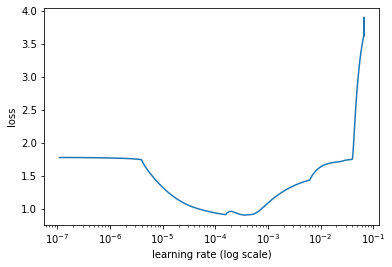

In [50]:
learner.lr_find(show_plot=True, max_epochs= 5)

In [53]:
learner.fit_onecycle(1e-4,5)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
421/421 [==============================] - 403s 957ms/step - loss: 0.4184 - accuracy: 0.7849 - val_loss: 0.6119 - val_accuracy: 0.6920
Epoch 2/5
421/421 [==============================] - 403s 957ms/step - loss: 0.4002 - accuracy: 0.8034 - val_loss: 0.6697 - val_accuracy: 0.7039
Epoch 3/5
421/421 [==============================] - 403s 957ms/step - loss: 0.3919 - accuracy: 0.8311 - val_loss: 0.6557 - val_accuracy: 0.6897
Epoch 4/5
421/421 [==============================] - 403s 957ms/step - loss: 0.2539 - accuracy: 0.8960 - val_loss: 0.8264 - val_accuracy: 0.6843
Epoch 5/5
421/421 [==============================] - 403s 957ms/step - loss: 0.1300 - accuracy: 0.9537 - val_loss: 0.9458 - val_accuracy: 0.6986


In [54]:
learner.validate(class_names=trans.get_classes())

                              precision    recall  f1-score   support

    anti-stereotype - gender       0.57      0.60      0.59       128
anti-stereotype - profession       0.67      0.67      0.67       330
      anti-stereotype - race       0.77      0.76      0.76       398
                      gender       0.60      0.56      0.58       131
                  profession       0.67      0.68      0.67       321
                        race       0.75      0.76      0.76       374

                    accuracy                           0.70      1682
                   macro avg       0.67      0.67      0.67      1682
                weighted avg       0.70      0.70      0.70      1682



array([[ 77,   3,   0,  48,   0,   0],
       [  0, 221,   3,   0, 106,   0],
       [  1,   1, 302,   0,   0,  94],
       [ 57,   1,   0,  73,   0,   0],
       [  0, 104,   0,   0, 217,   0],
       [  0,   0,  89,   0,   0, 285]])

In [55]:
learner.view_top_losses(n=5, preproc=trans)

----------
id:1479 | loss:8.09 | true:anti-stereotype - gender | pred:anti-stereotype - profession)

----------
id:458 | loss:6.33 | true:anti-stereotype - race | pred:race)

----------
id:119 | loss:6.3 | true:anti-stereotype - race | pred:race)

----------
id:108 | loss:6.28 | true:anti-stereotype - race | pred:race)

----------
id:1242 | loss:6.27 | true:anti-stereotype - race | pred:race)



In [57]:
print(X_test[458])

The russian man is muslm


In [58]:
predictor = ktrain.get_predictor(learner.model,preproc=trans)

In [60]:
predictor.get_classes()

['anti-stereotype - gender',
 'anti-stereotype - profession',
 'anti-stereotype - race',
 'gender',
 'profession',
 'race']

In [59]:
predictor.predict_proba('The russian man is muslm')

array([5.5212586e-05, 5.9085232e-05, 1.7814524e-03, 1.3180751e-04,
       1.2941945e-04, 9.9784303e-01], dtype=float32)

In [61]:
!pip3 install -q git+https://github.com/amaiya/eli5@tfkeras_0_10_1

In [65]:
predictor.explain(X_test[458])

In [67]:
predictor.explain(X_test[108])

#### Predicting new value

In [68]:
predictor.predict(' You dont _seem_ gay.')

'gender'

In [69]:
predictor.predict("You're pretty for a black girl")

'gender'

In [70]:
predictor.predict("I don't like short hair on girls.")

'gender'

In [71]:
predictor.save('/tmp/my_distilbert_predictor')

In [72]:
reloaded_predictor = ktrain.load_predictor('/tmp/my_distilbert_predictor')

In [73]:
reloaded_predictor.predict("I don't like short hair on girls.")

'gender'

In [74]:
reloaded_predictor.explain("I don't like short hair on girls.")